In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('breast-cancer-wisconsin.csv')
df.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Single Epithelial Cell Size.1,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
df.isnull().sum()

id number                        0
Clump Thickness                  0
Uniformity of Cell Size          0
Uniformity of Cell Shape         0
Marginal Adhesion                0
Single Epithelial Cell Size      0
Single Epithelial Cell Size.1    0
Bland Chromatin                  0
Normal Nucleoli                  0
Mitoses                          0
Class                            0
dtype: int64

In [3]:
df.dtypes

id number                         int64
Clump Thickness                   int64
Uniformity of Cell Size           int64
Uniformity of Cell Shape          int64
Marginal Adhesion                 int64
Single Epithelial Cell Size       int64
Single Epithelial Cell Size.1    object
Bland Chromatin                   int64
Normal Nucleoli                   int64
Mitoses                           int64
Class                             int64
dtype: object

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


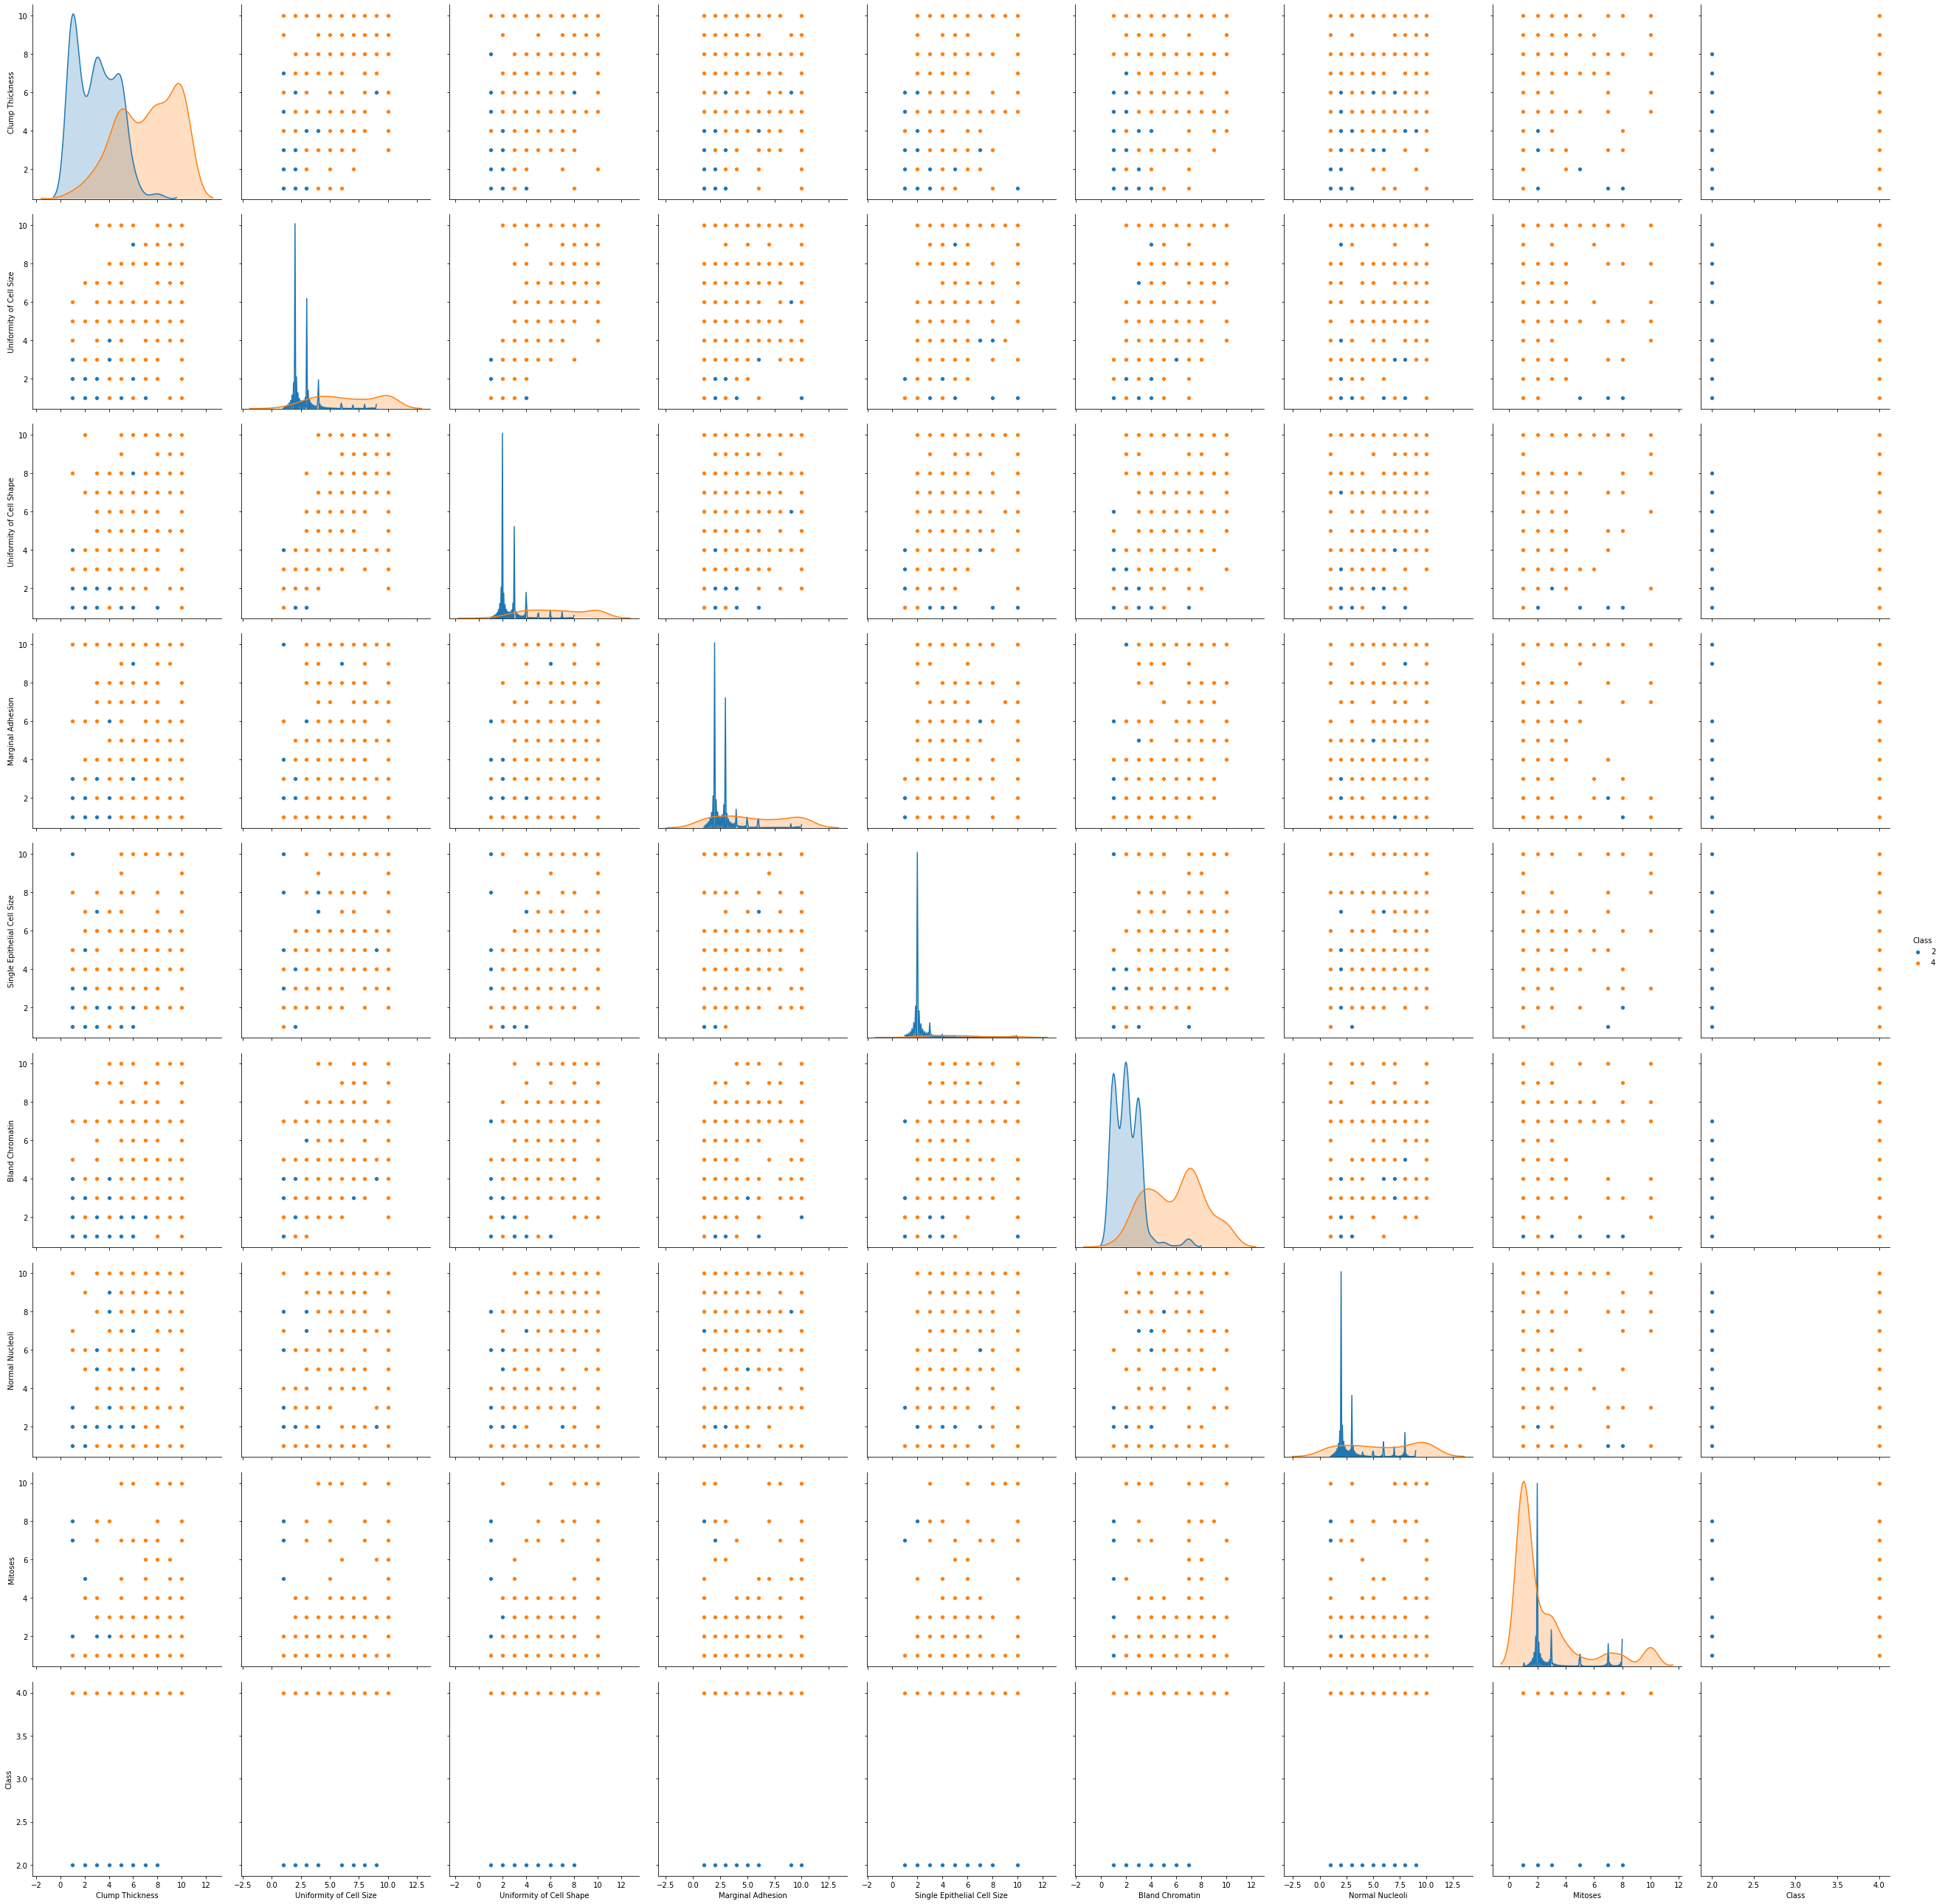

In [4]:
sns.pairplot(df.drop(['id number'],axis=1), height=4, hue='Class')

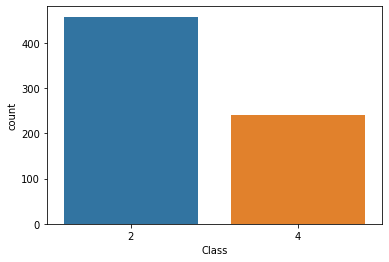

In [5]:
sns.countplot(x='Class', data=df)

In [6]:
df['Class'] = df['Class'].apply(lambda x: 0 if x==2 else 1)

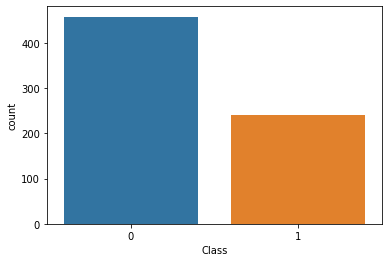

In [7]:
sns.countplot(x='Class', data=df)

In [8]:
X = pd.concat([df.drop(['id number','Class','Single Epithelial Cell Size.1'], axis=1), 
       pd.get_dummies(df[['Single Epithelial Cell Size.1']], drop_first = True)], axis=1)
y = df['Class']

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)
print(X.columns)

[False False  True False False False False False  True False  True  True
  True  True  True False  True  True]
[ 4  9  1  7 10  2  8  5  1  6  1  1  1  1  1  3  1  1]
Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli',
       'Mitoses', 'Single Epithelial Cell Size.1_10',
       'Single Epithelial Cell Size.1_2', 'Single Epithelial Cell Size.1_3',
       'Single Epithelial Cell Size.1_4', 'Single Epithelial Cell Size.1_5',
       'Single Epithelial Cell Size.1_6', 'Single Epithelial Cell Size.1_7',
       'Single Epithelial Cell Size.1_8', 'Single Epithelial Cell Size.1_9',
       'Single Epithelial Cell Size.1_?'],
      dtype='object')


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [10]:
import statsmodels.api as sm
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.309030
         Iterations: 35
                                        Results: Logit
Model:                        Logit                      Pseudo R-squared:           0.520     
Dependent Variable:           Class                      AIC:                        468.0246  
Date:                         2020-06-19 15:33           BIC:                        549.9183  
No. Observations:             699                        Log-Likelihood:             -216.01   
Df Model:                     17                         LL-Null:                    -450.26   
Df Residuals:                 681                        LLR p-value:                8.0425e-89
Converged:                    0.0000                     Scale:                      1.0000    
No. Iterations:               35.0000                                                          
-----------------------------------------------------------------------------------------------
               

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [17]:
# exclude list
exclude_list = ['Uniformity of Cell Shape',
                'Marginal Adhesion',
                'Mitoses',
                'Single Epithelial Cell Size.1_2',
                'Single Epithelial Cell Size.1_3',
                'Single Epithelial Cell Size.1_4',
                'Single Epithelial Cell Size.1_6',
                'Single Epithelial Cell Size.1_9',
                'Single Epithelial Cell Size.1_?'
               ]

In [19]:
X.drop(exclude_list,axis=1,inplace=True)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

SEED = 101
TEST_SIZE = 0.3

def model_evaluation(y_test, predictions):
    print('Confusion Matrix\n\n{}'.format(confusion_matrix(y_test, predictions)))
    print('\n')
    print('Classification Report\n\n{}'.format(classification_report(y_test, predictions)))
    print('\n')
    print('Accuracy Score\n\n{}'.format(accuracy_score(y_test, predictions)))
    
def linear_model_fit(X, y):
    
    # Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    predictions = logreg.predict(X_test)
    # # Naive Bayes
    # nb = MultinomialNB()
    # nb.fit(X_train, y_train)
    # predictions = nb.predict(X_test)
    model_evaluation(y_test, predictions)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    test_size = TEST_SIZE, random_state = SEED)

# data scale
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
model_evaluation(y_test, predictions)

Confusion Matrix

[[127   2]
 [  8  73]]


Classification Report

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       129
           1       0.97      0.90      0.94        81

    accuracy                           0.95       210
   macro avg       0.96      0.94      0.95       210
weighted avg       0.95      0.95      0.95       210



Accuracy Score

0.9523809523809523


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
#################
# SVM - champion!
#################
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)

# rfc = RandomForestClassifier(n_estimators=200)
# rfc.fit(X_train,y_train)
# predictions = rfc.predict(X_test)

model_evaluation(y_test, predictions)

Confusion Matrix

[[124   5]
 [  2  79]]


Classification Report

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       129
           1       0.94      0.98      0.96        81

    accuracy                           0.97       210
   macro avg       0.96      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



Accuracy Score

0.9666666666666667


In [24]:
###############
# Decision Tree
###############
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

model_evaluation(y_test, predictions)

Confusion Matrix

[[126   3]
 [  9  72]]


Classification Report

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       129
           1       0.96      0.89      0.92        81

    accuracy                           0.94       210
   macro avg       0.95      0.93      0.94       210
weighted avg       0.94      0.94      0.94       210



Accuracy Score

0.9428571428571428


In [25]:
###############
# Random Forest
###############
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

model_evaluation(y_test, predictions)

Confusion Matrix

[[124   5]
 [  3  78]]


Classification Report

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       129
           1       0.94      0.96      0.95        81

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



Accuracy Score

0.9619047619047619
